## Erstellung eines Python-Scripts zur Datenanalyse

#### Autorin: Britta Lelgemann

* Frage 1: Wieviele E-Books wurden im Jahr 2019 im Vergleich zu physischen Büchern ausgeliehen?
* Frage 2: Wieviele digitale Medien wurden insgesamt im Jahr 2019 im Vergleich zu physischen Medien ausgeliehen?
* Frage 3: Wieviele digitale Medien wurden im April 2019 im Vergleich zu April 2020 ausgeliehen?
* Frage 4: Welches Medium wurde 2019 am meisten ausgeliehen?
* Frage 5: Wie haben sich die Ausleihen über das Jahr 2019 verteilt?

### Vorbereitung der Datenanalyse

In [192]:
# Import des Packages "urllib" und des Moduls "request": 
import urllib.request
# Import von Pandas und Festlegung eines Alias: 
import pandas as pd 
# Import des Packages "matplotlib" und des Moduls "pyplot"
import matplotlib.pyplot as plt

In [199]:
# Angabe der URls, wo die Daten zu finden sind: 
url_2019 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
url_2019_apr = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutmonth=4%20and%20checkoutyear=2019&$limit=500000"
url_2020_apr = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutmonth=4%20and%20checkoutyear=2020&$limit=500000" 
# Erstellen von Dateien, in die die Daten gespeichert werden sollen & Festlegung von Variablen:
checkouts_file_2019 = "checkouts2019.csv"
checkouts_file_2019apr = "checkouts_2019apr.csv"
checkouts_file_2020apr = "checkouts2020apr.csv"

In [200]:
# Download der Daten mit der Funktion "urlretrieve" aus der urllib-library und dem Modul "request":
urllib.request.urlretrieve(url_2019, checkouts_file_2019)

('checkouts2019.csv', <http.client.HTTPMessage at 0x219d0b55808>)

In [201]:
urllib.request.urlretrieve(url_2019_apr, checkouts_file_2019apr)

('checkouts_2019apr.csv', <http.client.HTTPMessage at 0x219d0b52e88>)

In [202]:
urllib.request.urlretrieve(url_2020_apr, checkouts_file_2020apr)

('checkouts2020apr.csv', <http.client.HTTPMessage at 0x219ccc86408>)

In [203]:
# Die Daten mit Pandas ausgeben und diesen Befehl in einer Variablen ablegen:
checkouts_2019 = pd.read_csv(checkouts_file_2019)
checkouts_2019apr = pd.read_csv(checkouts_file_2019apr)
checkouts_2020apr = pd.read_csv(checkouts_file_2020apr)

In [204]:
# Anzeigen lassen:
checkouts_2019apr

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2019,4,3,The Epic Crush of Genie Lo,F. C. Yee,"Mythology, Young Adult Fiction",ABRAMS,2017
1,Digital,OverDrive,EBOOK,2019,4,1,Storms,Gerri Hill,"Fiction, Literature",Bella Books,2016
2,Digital,OverDrive,EBOOK,2019,4,3,Animal Farm,George Orwell,"Classic Literature, Fiction","1st World Publishing, Inc.",2010
3,Digital,OverDrive,EBOOK,2019,4,2,Coldwater,Samuel Parker,"Fiction, Suspense, Thriller",Baker Publishing Group,2018
4,Digital,OverDrive,EBOOK,2019,4,1,Into the Void,Tim Lebbon,"Fiction, Science Fiction, Thriller","Random House, Inc.",2013
...,...,...,...,...,...,...,...,...,...,...,...
216175,Physical,Horizon,BOOK,2019,4,1,The simple truths of service : inspired by Joh...,"Blanchard, Kenneth H.","Customer services, Consumer satisfaction","Simple Truths, an imprint of Sourcebooks, Inc,",[2017]
216176,Digital,OverDrive,AUDIOBOOK,2019,4,1,My Life as a Traitor (Unabridged),Zarah Ghahramani,"Biography & Autobiography, Nonfiction","Blackstone Audio, Inc.",2008
216177,Physical,Horizon,BOOK,2019,4,3,Birds : nature's magnificent flying machines /...,"Arnold, Caroline",Birds Flight Juvenile literature,"Charlesbridge,",[2003]
216178,Physical,Horizon,BOOK,2019,4,1,"Xiao mao diao yu / Jin Jin, zhu.","Jin, Jin (Children's book author)","Childrens stories Chinese, Short stories Chine...","Xian dai chu ban she,",2013.


In [205]:
checkouts_2020apr

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2020,4,3,A Dilly of a Death: China Bayles Mystery Serie...,Susan Wittig Albert,"Fiction, Mystery","Penguin Group (USA), Inc.",2011
1,Digital,OverDrive,AUDIOBOOK,2020,4,17,The Second Sleep: A novel (unabridged) (Unabri...,Robert Harris,"Fiction, Suspense, Thriller",Books on Tape,2019
2,Digital,OverDrive,EBOOK,2020,4,2,My Fate According to the Butterfly,Gail Villanueva,"Juvenile Fiction, Juvenile Literature","Scholastic, Inc. (US)",2019
3,Digital,OverDrive,AUDIOBOOK,2020,4,1,A Death in the Family (Unabridged),James Agee,"Classic Literature, Fiction","Blackstone Audio, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,4,4,"The Black Moth: Historical Romances Series, Bo...",Georgette Heyer,"Fiction, Historical Fiction, Literature, Romance",Sourcebooks,2010
...,...,...,...,...,...,...,...,...,...,...,...
93666,Digital,OverDrive,EBOOK,2020,4,1,Half Pass,Astrid Amara,"Fiction, Romance","Samhain Publishing, Ltd.",2013
93667,Digital,OverDrive,AUDIOBOOK,2020,4,1,K: A History of Baseball in Ten Pitches (unabr...,Tyler Kepner,"Nonfiction, Sports & Recreations",Books on Tape,2019
93668,Digital,OverDrive,EBOOK,2020,4,1,Princess Ai of Ai-Land: The Comic Strip Collec...,D. J. Milky,"Comic and Graphic Books, Fiction",Bookwire GmbH,2011
93669,Digital,OverDrive,EBOOK,2020,4,110,The Immortalists,Chloe Benjamin,"Fiction, Literature","Penguin Group (USA), Inc.",2018


### Frage 1: Wieviele E-Books wurden im Jahr 2019 im Vergleich zu physischen Büchern ausgeliehen? 


In [137]:
# dir(checkouts_2019)

In [138]:
# Ich lasse mir die Spalten anzeigen, um eine Übersicht zu bekommen:
checkouts_2019.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [139]:
# Außerdem lasse ich mir die ersten zwei Zeilen der Liste anzeigen:
checkouts_2019.head(2)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.


In [140]:
# Nun lasse ich mir die Datentypen anzeigen:
checkouts_2019.dtypes

usageclass         object
checkouttype       object
materialtype       object
checkoutyear        int64
checkoutmonth       int64
checkouts           int64
title              object
creator            object
subjects           object
publisher          object
publicationyear    object
dtype: object

In [141]:
# Zeilen mit Büchern rausfiltern:
checkouts_2019_filtered = checkouts_2019.where(checkouts_2019['materialtype'] == 'BOOK')

# Die Spalte checkouts rausfiltern und summieren:
buchausleihen = checkouts_2019_filtered['checkouts'].sum()

In [142]:
buchausleihen

14925.0

In [143]:
# Zeilen mit EBooks rausfiltern:
checkouts_2019_filtered = checkouts_2019.where(checkouts_2019['materialtype'] == 'EBOOK')

# die Spalte checkouts rausfiltern und summieren
ebookausleihen = checkouts_2019_filtered['checkouts'].sum()

In [144]:
ebookausleihen

9903.0

In [145]:
gesamtausleihen = buchausleihen + ebookausleihen
gesamtausleihen

24828.0

In [146]:
# Prozentzahl von Ebooks an Gesamtausleihen EBooks und Physischen Büchern
ebookausleihen / gesamtausleihen *100

39.886418559690675

### Antwort: Es wurden insgesamt  24917 Bücher ausgeliehen und 9919 E-Books.

#### Anmerkung: nicht die tatsächliche Anzahl, weil nicht alle Daten runtergeladen wurden
#### --------------------------------------------------------------------

### Frage 2: Wieviele digitale Medien wurden insgesamt im Jahr 2019 im Vergleich zu physischen Medien ausgeliehen? 


In [147]:
# Zur Erinnerung: die Materialtypen haben unterschiedliche "usageclasses", 
# ... d.h. sie sind "Digital" oder "Physical":
checkouts_2019[['usageclass', 'materialtype']]

,usageclass,materialtype
0,Digital,AUDIOBOOK
1,Physical,BOOK
2,Physical,BOOK
3,Physical,BOOK
4,Digital,EBOOK
...,...,...
9995,Physical,BOOK
9996,Digital,EBOOK
9997,Physical,BOOK
9998,Physical,BOOK


In [148]:
# Zeilen rausfiltern mit where

physisch_2019_filtered = checkouts_2019.where(checkouts_2019['usageclass'] == 'Physical')
digital_2019_filtered = checkouts_2019.where(checkouts_2019['usageclass'] == 'Digital')

In [149]:
# die Spalte checkouts rausfiltern und summieren
physischeausleihen = physisch_2019_filtered['checkouts'].sum()
digitaleausleihen = digital_2019_filtered['checkouts'].sum()

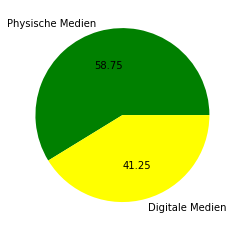

In [150]:
# ... und stelle nun die prozentualen Anteile in einem Kuchendiagramm dar:

# Farben und Beschriftung festlegen
kuchenfarben = ['green', 'yellow']
items = ['Physische Medien', 'Digitale Medien']

# Kuchendiagramm plotten
plt.pie([physischeausleihen, digitaleausleihen], colors = kuchenfarben, labels = items, autopct='%.2f')

# ... und anzeigen lassen
plt.show()

### 41,26 % der ausgeliehenen Medien waren digital.
#### --------------------------------------------------------------------

### Frage 3: Wieviele digitale Medien wurden im April 2019 im Vergleich zu April 2020 ausgeliehen?

In [159]:
# Nun möchte ich herausfinden, wie die Ausleihen im April der beiden Jahre sich unterscheiden.

# Zunächst lasse ich mir die Spalten "usageclass" und "checkoutmonth" anzeigen:
checkouts_2019apr[['usageclass', 'checkoutmonth']]

# Bei der Ausgabe sehe ich, dass die Monate nach Zahlen benannt sind:

,usageclass,checkoutmonth
0,Physical,4
1,Physical,4
2,Physical,4
3,Digital,4
4,Physical,4
...,...,...
9995,Digital,4
9996,Physical,4
9997,Physical,4
9998,Physical,4


In [162]:
# wieder Zeilen rausfiltern mit where

digital_2019apr_filtered = checkouts_2019apr.where(checkouts_2019apr['usageclass'] == 'Physical')
digital_2020apr_filtered = checkouts_2020apr.where(checkouts_2020apr['usageclass'] == 'Digital')

In [163]:
# wieder die Spalte checkouts rausfiltern und summieren
digital_apr19 = digital_2019apr_filtered['checkouts'].sum()
digital_apr20 = digital_2020apr_filtered['checkouts'].sum()

In [206]:
print(digital_apr19)
print(digital_apr20)

22191.0
37865.0


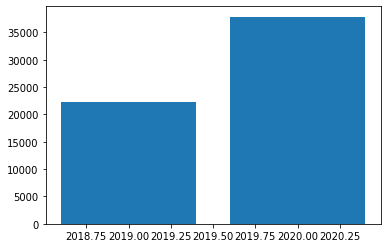

In [213]:
# ... und stelle nun die Anteile in einem Stabdiagram dar:

digital_apr = [digital_apr19, digital_apr20]

# Stabdiagramm plotten
plt.bar([2019,2020],digital_apr)

# ... und anzeigen lassen
plt.show()

# -----> bedienungsanleitung lesen, um die untere Leiste zu vereinfachen

### Frage 4: Welches Medium wurde im Dezember 2019 am meisten ausgeliehen?

In [225]:
checkouts_2019.checkouts.max()

560

In [226]:
# Titel, Materialtypen und Ausleihen anzeigen lassen & sortieren:

checkouts_2019[['title', 'materialtype', 'checkouts']].sort_values(by = ["checkouts"], ascending = False)[0:50]

# "by" gibt an, nach welcher Spalte sortiert wird
# "ascending" bedeutet "aufsteigend"
# "[0:50]" zeigt die ersten 10 Zeilen an

,title,materialtype,checkouts
7134,The testaments / Margaret Atwood.,BOOK,560
239,Where the crawdads sing / Delia Owens.,BOOK,549
2414,"Girl, woman, other / Bernardine Evaristo.",BOOK,486
4892,Children of virtue and vengeance / Tomi Adeyemi.,BOOK,409
2534,Bad Blood: Secrets and Lies in a Silicon Valle...,EBOOK,261
2175,We are Puget Sound : discovering & recovering ...,BOOK,253
1555,Eleanor Oliphant Is Completely Fine: A Novel,EBOOK,191
4065,The Great Alone: A Novel,EBOOK,182
2478,Long shot / Lionsgate ; in association with Go...,VIDEODISC,168
7946,Downton Abbey / Focus Features ; Perfect World...,VIDEODISC,145


560

### Frage 5: Wie haben sich die Ausleihen über das Jahr 2019 verteilt?